# To predict whether the lunch is free or not 

## Step #1: Importing all the required packages and dataset; 

### importing the dataset

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### reading the dataset

In [72]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### some info about the dataset

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## Step #2: Visualization

### visualizations

Text(0, 0.5, 'Frequency')

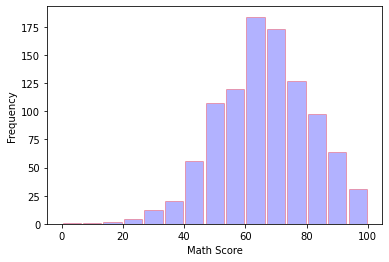

In [74]:
#plotting histogram 
plt.hist(df['math score'],rwidth=0.9,alpha=0.3,color='blue',bins=15,edgecolor='red') 

#x and y-axis labels 
plt.xlabel('Math Score') 
plt.ylabel('Frequency') 

Text(0, 0.5, 'Frequency')

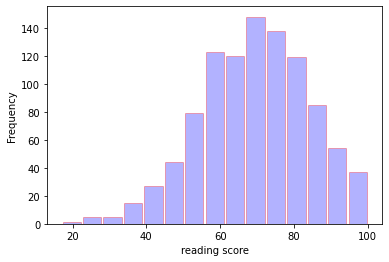

In [75]:
#plotting histogram 
plt.hist(df['reading score'],rwidth=0.9,alpha=0.3,color='blue',bins=15,edgecolor='red') 

#x and y-axis labels 
plt.xlabel('reading score') 
plt.ylabel('Frequency') 

Text(0, 0.5, 'Frequency')

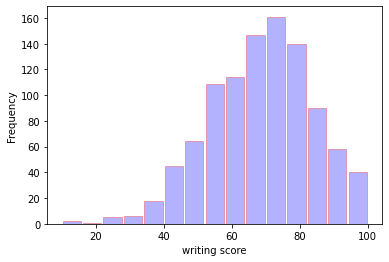

In [76]:
#plotting histogram 
plt.hist(df['writing score'],rwidth=0.9,alpha=0.3,color='blue',bins=15,edgecolor='red') 

#x and y-axis labels 
plt.xlabel('writing score') 
plt.ylabel('Frequency') 

<AxesSubplot:xlabel='gender', ylabel='count'>

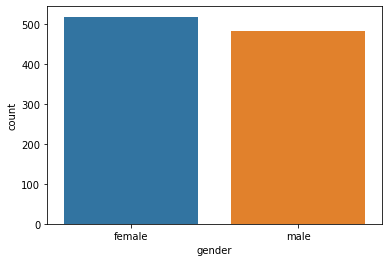

In [77]:
sns.countplot(x="gender", data=df)

From the above countplot, it is clear that men are more in count when compared with women

<AxesSubplot:xlabel='race/ethnicity', ylabel='count'>

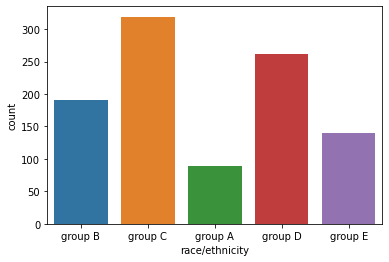

In [78]:
sns.countplot(x="race/ethnicity", data= df)

More students belong to group A race

<AxesSubplot:xlabel='race/ethnicity', ylabel='count'>

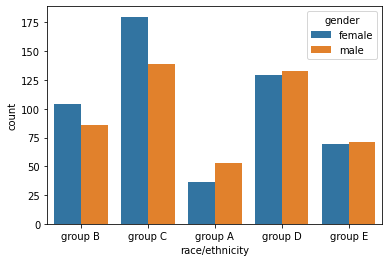

In [79]:
sns.countplot(x="race/ethnicity", hue= "gender", data= df)

<AxesSubplot:xlabel='count', ylabel='parental level of education'>

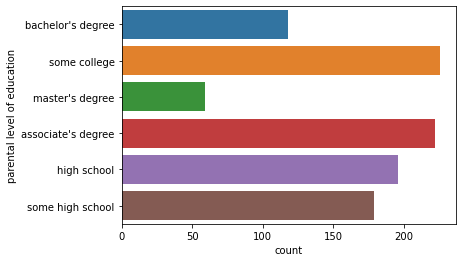

In [80]:
sns.countplot(y="parental level of education", data= df)

Most of the parents have completed some college or masters degree

<AxesSubplot:xlabel='count', ylabel='parental level of education'>

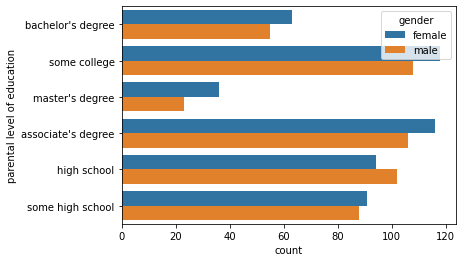

In [81]:
sns.countplot(y="parental level of education", hue= "gender", data= df)

<AxesSubplot:xlabel='lunch', ylabel='count'>

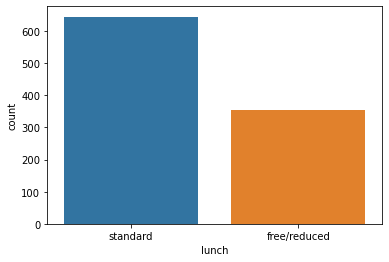

In [82]:
sns.countplot(x= "lunch", data= df)

Very less students have free lunch

<AxesSubplot:xlabel='lunch', ylabel='count'>

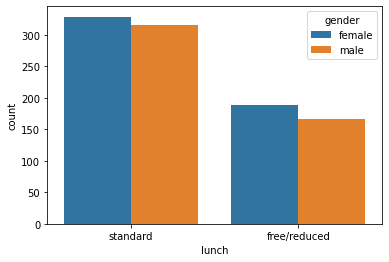

In [83]:
sns.countplot(x= "lunch", hue= "gender", data= df)

<AxesSubplot:xlabel='test preparation course', ylabel='count'>

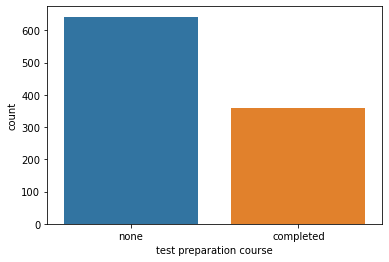

In [84]:
sns.countplot(x="test preparation course", data=df)

Most of them have not attended the test preparartion course

<AxesSubplot:xlabel='test preparation course', ylabel='count'>

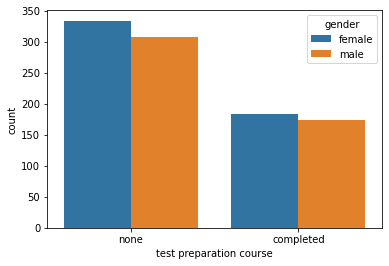

In [85]:
sns.countplot(x="test preparation course", hue= "gender", data=df)

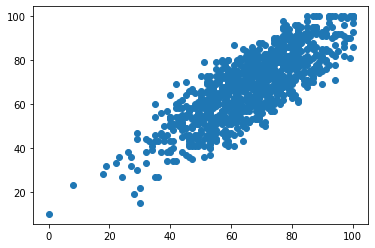

In [86]:
plt.scatter(df['math score'], df['writing score'])

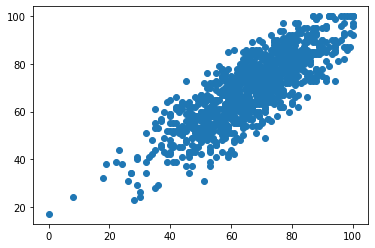

In [87]:
plt.scatter(df['math score'], df['reading score'])

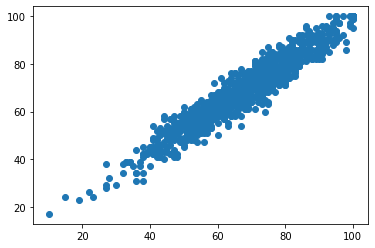

In [88]:
plt.scatter(df['writing score'], df['reading score'])

student who scores high mark in reading also scores high in writing and math

## Step #3: Data Cleaning

# gender

In [89]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [90]:
df['gender'].head()

0    female
1    female
2    female
3      male
4      male
Name: gender, dtype: object

In [91]:
df['gender'] = pd.get_dummies(df['gender'], drop_first=True) #male is 1
df['gender'].head()

0    0
1    0
2    0
3    1
4    1
Name: gender, dtype: uint8

# race/ethnicity

In [92]:
df['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

In [93]:
df['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [94]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['race/ethnicity'] = label_encoder.fit_transform(df['race/ethnicity'])

df['race/ethnicity'].unique()

array([1, 2, 0, 3, 4])

group C - 2<br>
group D - 3<br>
group B - 1<br>
group E - 4<br>
group A - 0<br>

In [95]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,bachelor's degree,standard,none,72,72,74
1,0,2,some college,standard,completed,69,90,88
2,0,1,master's degree,standard,none,90,95,93
3,1,0,associate's degree,free/reduced,none,47,57,44
4,1,2,some college,standard,none,76,78,75


# parental level of education

In [96]:
df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [97]:
df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [98]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['parental level of education'] = label_encoder.fit_transform(df['parental level of education'])

df['parental level of education'].unique()

array([1, 4, 3, 0, 2, 5])

some college - 4<br>
associate's degree - 0<br>
high school - 2<br>
some high school - 5<br>
bachelor's degree - 1<br>
master's degree - 3<br>

In [99]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,standard,none,72,72,74
1,0,2,4,standard,completed,69,90,88
2,0,1,3,standard,none,90,95,93
3,1,0,0,free/reduced,none,47,57,44
4,1,2,4,standard,none,76,78,75


# lunch

In [100]:
df['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

In [101]:
df.lunch.head()

0        standard
1        standard
2        standard
3    free/reduced
4        standard
Name: lunch, dtype: object

In [102]:
df['lunch'] = pd.get_dummies(df['lunch'], drop_first=True) #standard is 1
df['lunch'].head()

0    1
1    1
2    1
3    0
4    1
Name: lunch, dtype: uint8

In [103]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,none,72,72,74
1,0,2,4,1,completed,69,90,88
2,0,1,3,1,none,90,95,93
3,1,0,0,0,none,47,57,44
4,1,2,4,1,none,76,78,75


# test preparation course

In [104]:
df['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

In [105]:
df['test preparation course'].head()

0         none
1    completed
2         none
3         none
4         none
Name: test preparation course, dtype: object

In [106]:
df['test preparation course'] = pd.get_dummies(df['test preparation course'], drop_first=True) #none is 1
df['test preparation course'].head()

0    1
1    0
2    1
3    1
4    1
Name: test preparation course, dtype: uint8

In [107]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75


## Step #4: Feature Selection

In [108]:
df.corr()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
gender,1.000000,-0.001502,0.001913,0.021372,-0.006028,0.167982,-0.244313,-0.301225
race/ethnicity,-0.001502,1.000000,-0.031946,0.046563,-0.017508,0.216415,0.145253,0.165691
parental level of education,0.001913,-0.031946,1.000000,0.006320,-0.023968,-0.068279,-0.072444,-0.084299
lunch,0.021372,0.046563,0.006320,1.000000,0.017044,0.350877,0.229560,0.245769
test preparation course,-0.006028,-0.017508,-0.023968,0.017044,1.000000,-0.177702,-0.241780,-0.312946
math score,0.167982,0.216415,-0.068279,0.350877,-0.177702,1.000000,0.817580,0.802642
reading score,-0.244313,0.145253,-0.072444,0.229560,-0.241780,0.817580,1.000000,0.954598
writing score,-0.301225,0.165691,-0.084299,0.245769,-0.312946,0.802642,0.954598,1.000000


## Step #5: Splitting the dataset into training and testing

In [151]:
X = df.drop(["lunch"], axis=1)
Y = df["lunch"]

In [152]:
X.head()

,gender,race/ethnicity,parental level of education,test preparation course,math score,reading score,writing score
0,0,1,1,1,72,72,74
1,0,2,4,0,69,90,88
2,0,1,3,1,90,95,93
3,1,0,0,1,47,57,44
4,1,2,4,1,76,78,75


In [153]:
Y.head()

0    1
1    1
2    1
3    0
4    1
Name: lunch, dtype: uint8

In [160]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}

In [165]:

from sklearn.model_selection import GridSearchCV
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X, Y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df1 = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df1

,model,best_score,best_params
0,svm,0.707,"{'C': 20, 'kernel': 'linear'}"
1,random_forest,0.624,{'n_estimators': 5}
2,logistic_regression,0.706,{'C': 5}


## step #6: Model Building

In [169]:
from sklearn.svm import SVC
model = SVC(C= 20, kernel= 'linear')

In [178]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.3, random_state=0)

In [179]:
model.fit(x_train, y_train)

SVC(C=20, kernel='linear')

In [180]:
y_pred  = model.predict(x_test)

In [183]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6933333333333334
